In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('economic_index.csv')

In [10]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [11]:
## Drop unnecessary columns 
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [12]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [13]:
# Check null values

df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

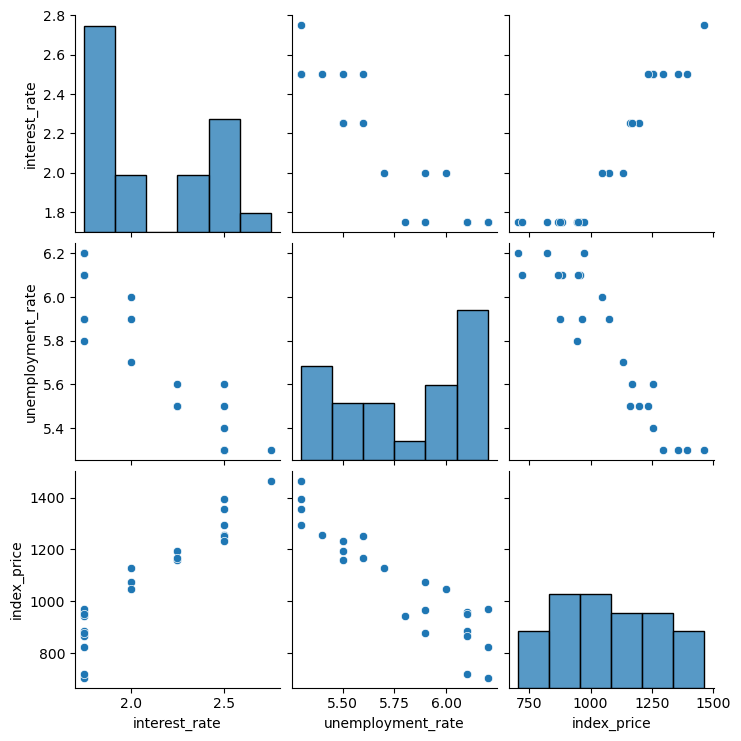

In [14]:
## Lets do some visualization

sns.pairplot(df)

In [15]:
## Correlation

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

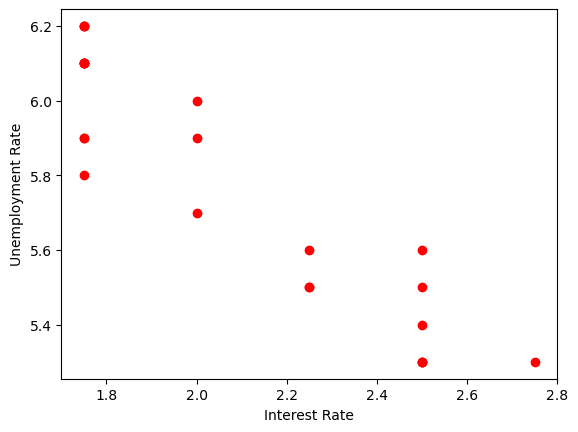

In [18]:
# Some more visualization 

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [19]:
# Independent and Dependent variable 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [21]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [22]:
## Train Test Split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

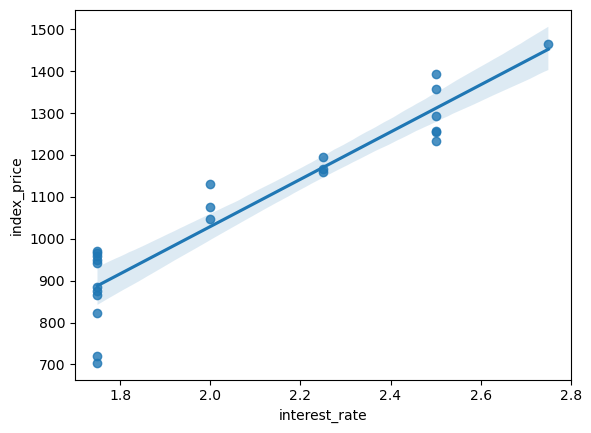

In [27]:
sns.regplot(data=df, x='interest_rate', y='index_price')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

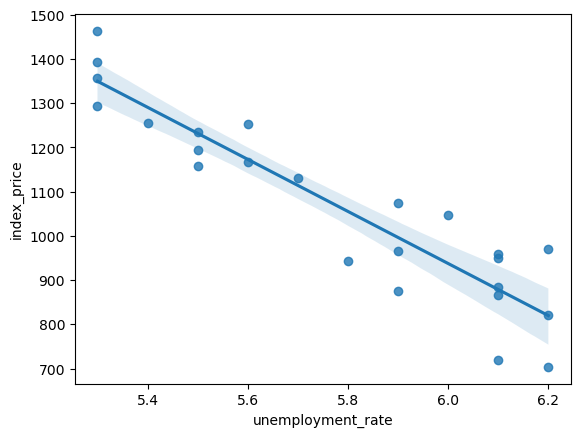

In [28]:
sns.regplot(data=df, x='unemployment_rate', y='index_price')

In [29]:
## Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [32]:
## Apply Simple Linear Regression 
from sklearn.linear_model import LinearRegression 

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
regression.coef_

array([  88.27275507, -116.25716066])

In [36]:
regression.intercept_

1053.4444444444443

In [43]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [44]:
np.mean(validation_score)

-5914.828180162388

In [45]:
## Prediction for test data 
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [46]:
## Performamce Metrices 
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [47]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [48]:
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [49]:
from sklearn.metrics import r2_score

In [50]:
score=r2_score(y_test,y_pred)

In [51]:
score

0.8278978091457142

In [52]:
# Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.713163015242857

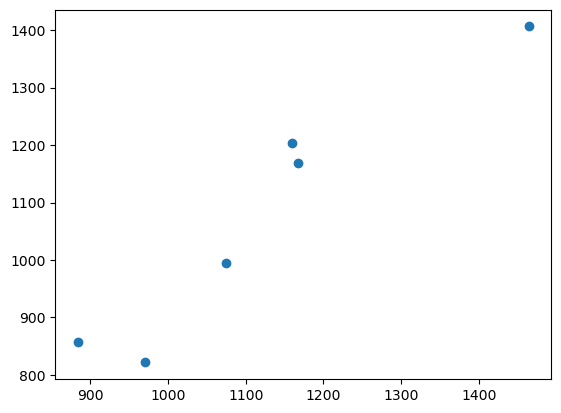

In [53]:
## Assumption 

plt.scatter(y_test,y_pred)

In [54]:
residuals = y_test-y_pred

In [55]:
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

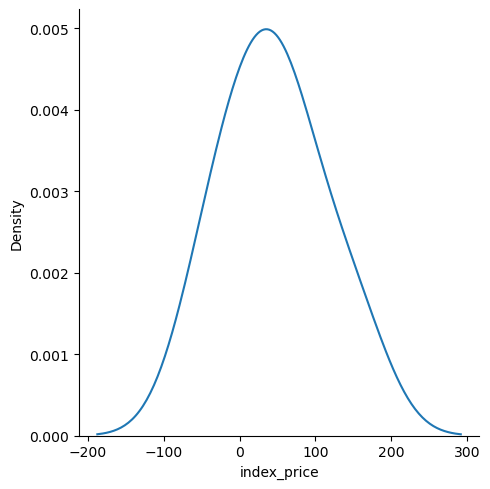

In [56]:
sns.displot(residuals,kind='kde')

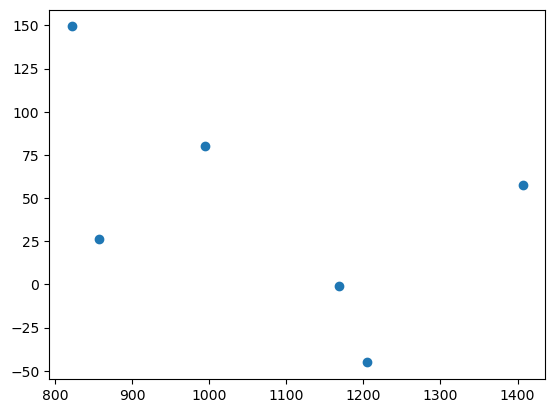

In [57]:
plt.scatter(y_pred,residuals)

In [58]:
import statsmodels.api as sm

In [59]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print(predictions)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                       0.754
Time:                        19:06:49   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------